In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
data=pd.read_csv('/content/data.csv')
print(data.shape)
data.head()

(944, 10)


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
data.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


In [ ]:
fea_col=['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature']
x=data[fea_col]
y=data.fail
# Split data into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

# Create a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.87
Precision: 0.85
Recall: 0.89
F1-score: 0.87
Confusion Matrix:
[[88 14]
 [10 77]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


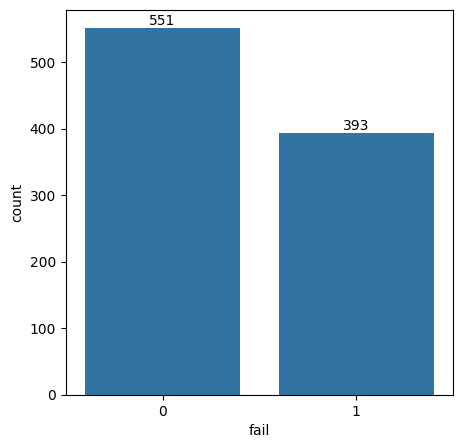

In [24]:
plt.figure(figsize=(5,5))
a=sn.countplot(data=data,x='fail')
a.bar_label(a.containers[0])
plt.show()